# **Stroke**

# **Libraries**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.proportion import proportions_ztest
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import warnings

# **Display Parameters**

## **Display Features**

In [60]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")

## **Colors**

In [61]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [62]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Overview and Preprocessing**

In [163]:
data = pd.read_csv(
    r"C:\Users\Dell\Documents\Stroke\Data\stroke.csv",
    index_col=0
)

data = data.drop(columns=['ID'])

target = 'Stroke'

In [120]:
data.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work,Residence,AVG Glucose,BMI,Smoking,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Number of Rows and Columns**

In [65]:
data.shape

(5109, 11)

## **Missing Data**

In [66]:
data.isnull().sum(axis=0)

Gender             0
Age                0
Hypertension       0
Heart Disease      0
Ever Married       0
Work               0
Residence          0
AVG Glucose        0
BMI              201
Smoking            0
Stroke             0
dtype: int64

# **Impute missing values for BMI Data**

## **Add Missing Indicator**

In [121]:
ami = AddMissingIndicator()
data = ami.fit_transform(data)

data = data.rename(columns={'BMI_na': 'BMI Missing'})

## **Median Imputer**

In [122]:
mmi = MeanMedianImputer(imputation_method='median')
data = mmi.fit_transform(data)

## **Imputed Data**

In [69]:
data.isnull().sum(axis=0)

Gender           0
Age              0
Hypertension     0
Heart Disease    0
Ever Married     0
Work             0
Residence        0
AVG Glucose      0
BMI              0
Smoking          0
Stroke           0
BMI Missing      0
dtype: int64

## **Data Types**

In [70]:
data.dtypes

Gender            object
Age              float64
Hypertension       int64
Heart Disease      int64
Ever Married      object
Work              object
Residence         object
AVG Glucose      float64
BMI              float64
Smoking           object
Stroke             int64
BMI Missing        int64
dtype: object

# **Functions**

## **Barplot**

In [71]:
def barplot(data, x, y, xlabel, ylabel, labels, title):
    plt.rcParams.update(params)
    
    # Creating the bar plot
    ax = sns.barplot(
        x=x,
        y=y,
        data=data,
        palette="Reds",
        order=labels
    )
    
    # Calculate total for percentage calculation
    total = data[y].sum()
    
    # Annotating the bars with percentage values
    for p in ax.patches:
        height = p.get_height()
        percentage = "{:.1f}%".format(100 * height / total)
        x_position = p.get_x() + p.get_width() / 2
        y_position = height
        ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom', size=12)
    
    # Setting the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## **Distributions**

In [72]:
def distributions(df, feature, target):
    distribution = df.groupby(feature)[target].sum().reset_index()
    distribution.columns = [feature, 'Count']

    return distribution

# **Exploratory Data Analysis**

# **Gender of Stroke Patients**

In [73]:
feature = 'Gender'

gender_distribution = distributions(data, feature, target)

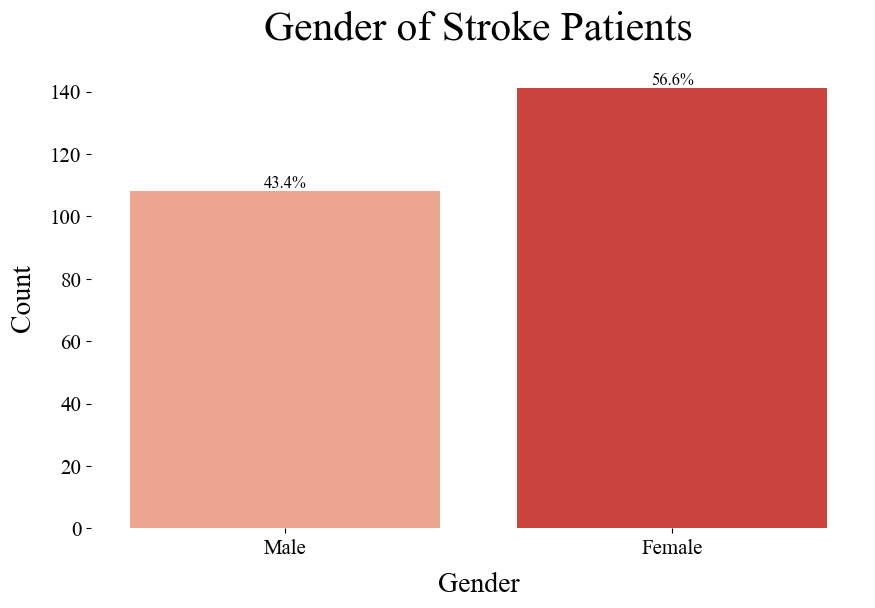

In [74]:
labels = ['Male', 'Female']

x = feature
y = 'Count'
df = gender_distribution
xlabel = 'Gender'
ylabel = 'Count'
lables = labels
title = 'Gender of Stroke Patients'

barplot(df, x, y, xlabel, ylabel, labels, title)

## **Hypertension Among Stroke Patients**

In [75]:
feature = 'Hypertension'

hypertension_distribution = distributions(data, feature, target)

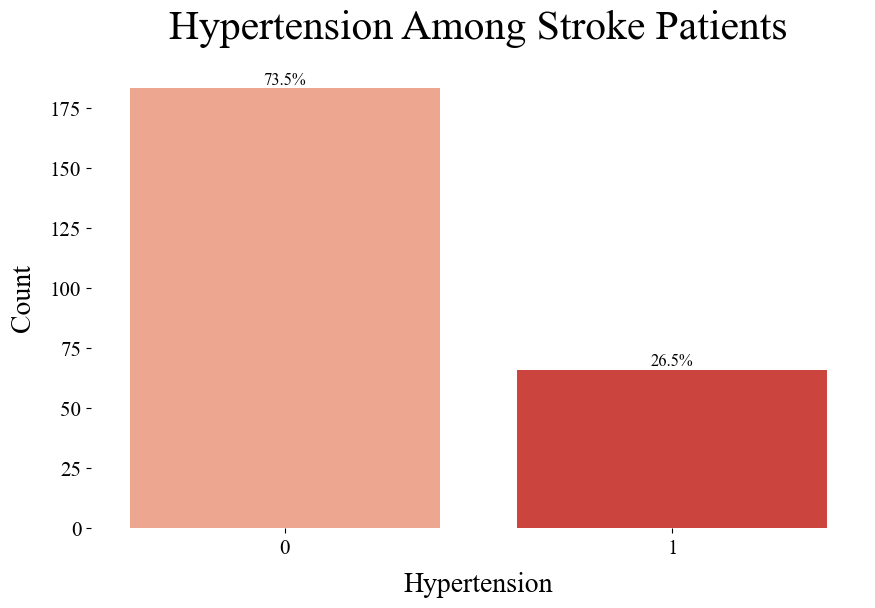

In [76]:
labels = [0, 1]

x = feature
y = 'Count'
df = hypertension_distribution
xlabel = 'Hypertension'
ylabel = 'Count'
lables = labels
title = 'Hypertension Among Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Heart Disease Among Stroke Patients**

In [77]:
feature = 'Heart Disease'

heartdisease_distribution = distributions(data, feature, target)

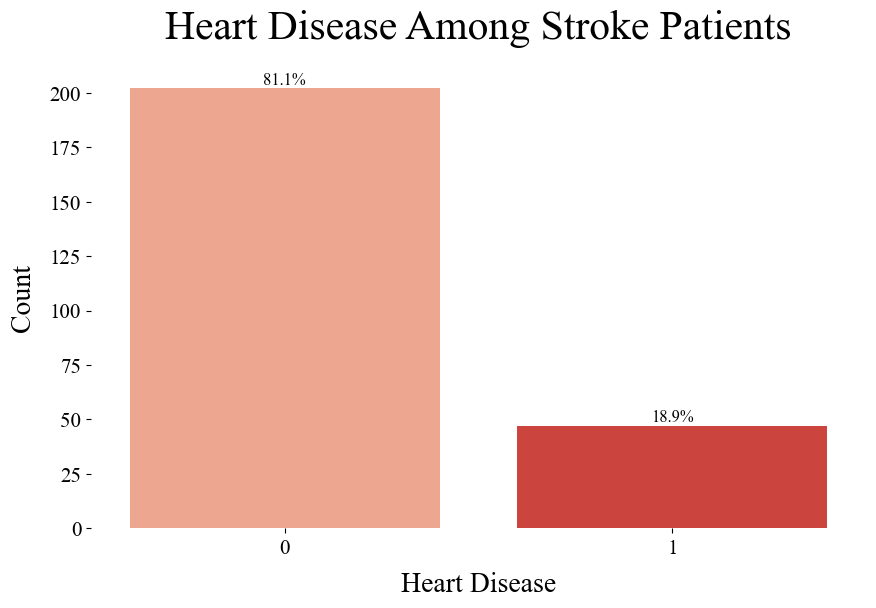

In [78]:
labels = [0, 1]

x = feature
y = 'Count'
df = heartdisease_distribution
xlabel = feature
ylabel = 'Count'
lables = labels
title = 'Heart Disease Among Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Marital Status of Stroke Patients**

In [79]:
feature = 'Ever Married'

married_distribution = distributions(data, feature, target)

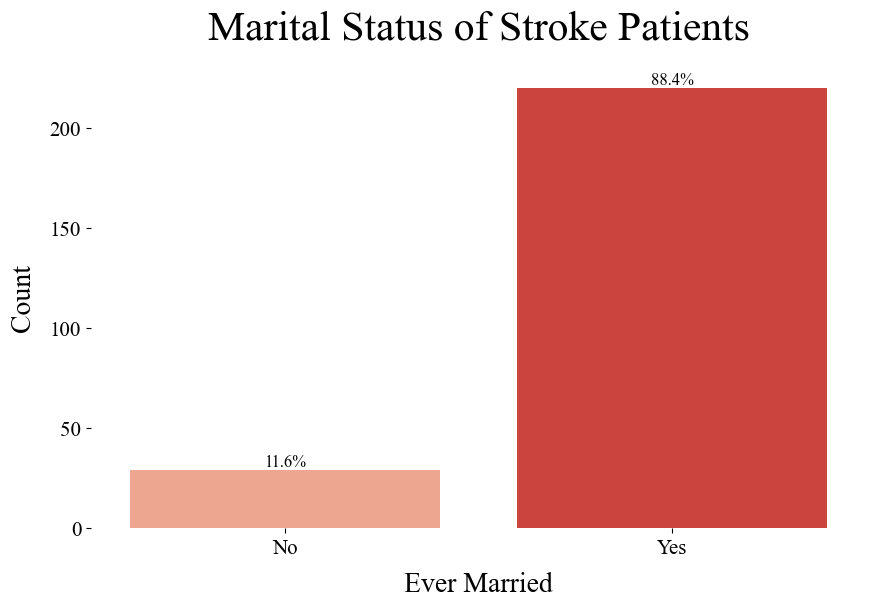

In [80]:
labels = ['No', 'Yes']

x = feature
y = 'Count'
df = married_distribution
xlabel = feature
ylabel = 'Count'
lables = labels
title = 'Marital Status of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Work Status of Stroke Patients**

In [81]:
feature = 'Work'

work_distribution = distributions(data, feature, target)

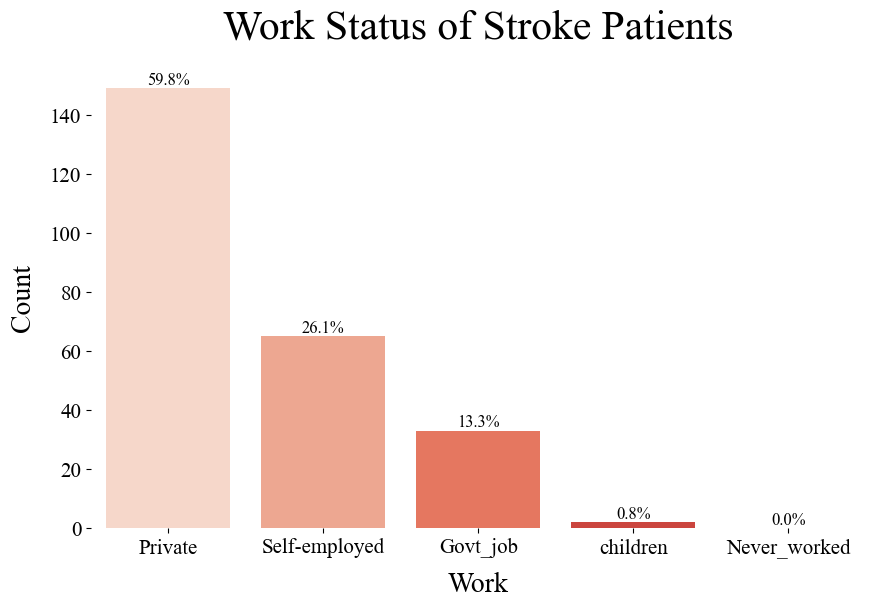

In [82]:
labels = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

x = feature
y = 'Count'
df = work_distribution
xlabel = feature
ylabel = 'Count'
lables = labels
title = 'Work Status of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Residence Type of Stroke Patients**

In [83]:
feature = 'Residence'

residence_distribution = distributions(data, feature, target)

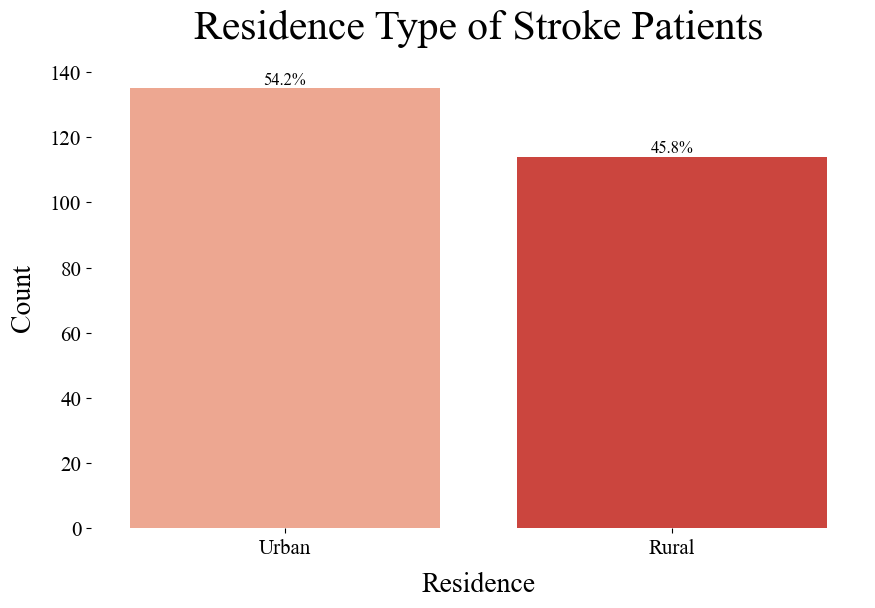

In [84]:
labels = ['Urban', 'Rural']

x = feature
y = 'Count'
df = residence_distribution
xlabel = feature
ylabel = 'Count'
lables = labels
title = 'Residence Type of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Average Glucose Levels of Stroke Patients**

In [85]:
feature = 'AVG Glucose'

glucose_distribution = distributions(data, feature, target)

In [86]:
glucose_distribution.shape

(3978, 2)

In [87]:
new_feature = 'Glucose Level'
df = glucose_distribution

bins = [50, 100, 150, 200, 250, 300]
labels = ['50-100', '101-150', '151-200', '201-250', '251-300']

df[new_feature] = pd.cut(df[feature], bins=bins, labels=labels, right=False)
glucose_group_counts = df[new_feature].value_counts().sort_index()

glucose_group_counts_df = glucose_group_counts.reset_index()
glucose_group_counts_df.columns = [new_feature, 'Count']

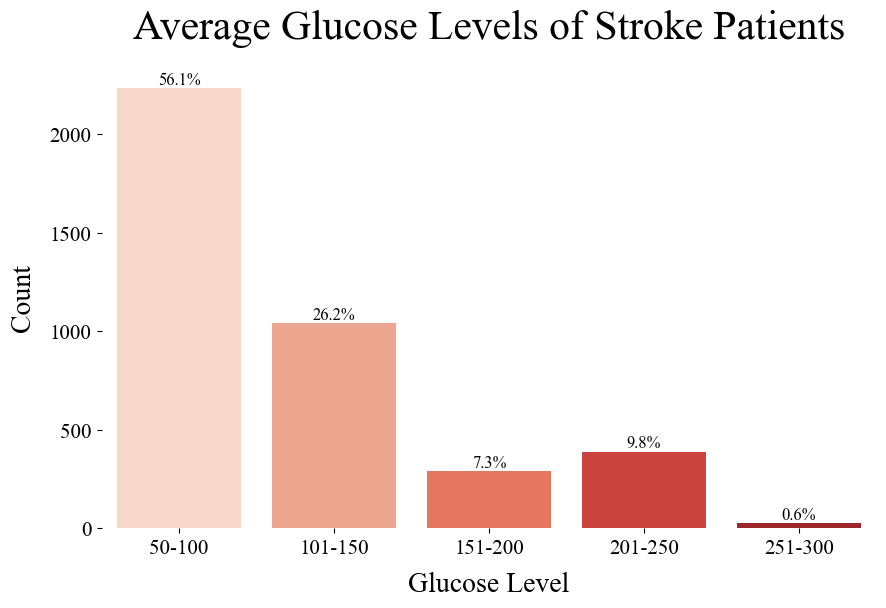

In [88]:
x = new_feature
y = 'Count'
df = glucose_group_counts_df
xlabel = new_feature
ylabel = y
labels = labels
title = 'Average Glucose Levels of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

# **BMI Levels of Stroke Patients**

In [126]:
feature = 'BMI'

BMI_distribution = distributions(data, feature, target)

In [127]:
BMI_distribution.shape

(418, 2)

In [134]:
new_feature = 'BMI Level'
df = BMI_distribution

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df[new_feature] = pd.cut(df[feature], bins=bins, labels=labels, right=False)
BMI_group_counts = df[new_feature].value_counts().sort_index()

BMI_group_counts_df = BMI_group_counts.reset_index()
BMI_group_counts_df.columns = [new_feature, 'Count']

In [135]:
BMI_group_counts_df

,BMI Level,Count
0,0-10,0
1,11-20,73
2,21-30,100
3,31-40,100
4,41-50,89
5,51-60,44
6,61-70,8
7,71-80,2
8,81-90,0
9,91-100,2


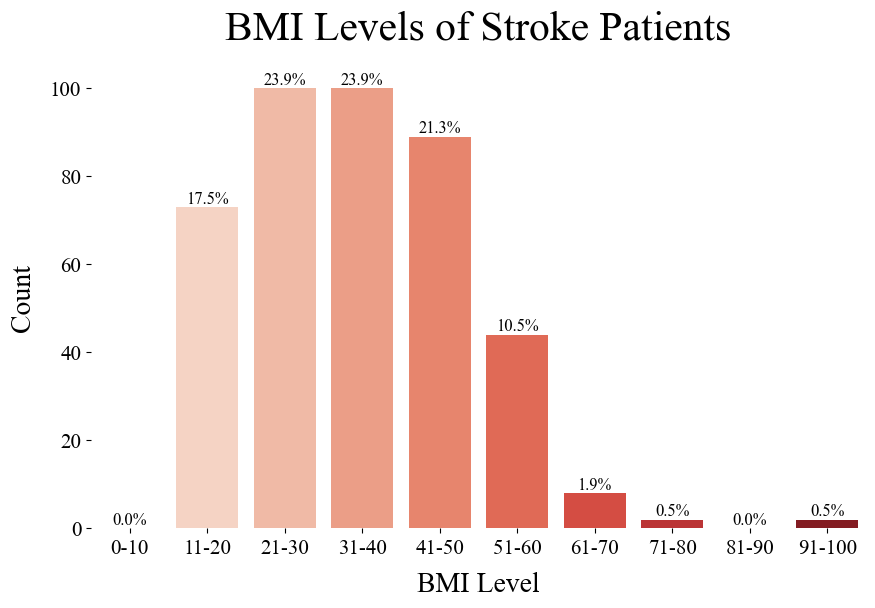

In [136]:
x = new_feature
y = 'Count'
df = BMI_group_counts_df
xlabel = 'BMI Level'
ylabel = y
labels = labels
title = 'BMI Levels of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Smoking Habits of Stroke Patients**

In [94]:
feature = 'Smoking'

smoking_distribution = distributions(data, feature, target)

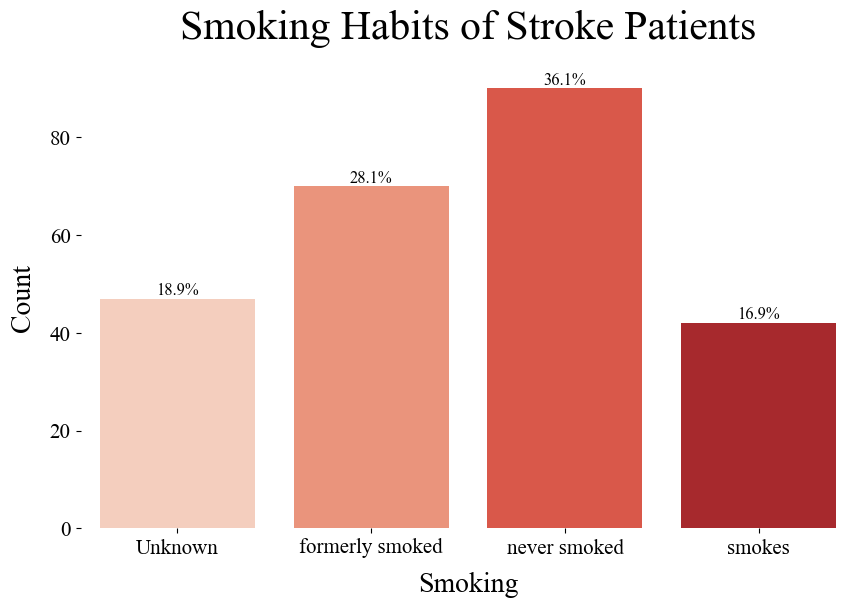

In [95]:
df = smoking_distribution
labels = ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
y = 'Count'

x = feature
y = y
df = df
xlabel = feature
ylabel = y
lables = labels
title = 'Smoking Habits of Stroke Patients'


barplot(df, x, y, xlabel, ylabel, labels, title)

## **Ages of Data Participants**

In [96]:
feature = 'Age'
new_feature = 'Age Group'

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

data[new_feature] = pd.cut(data[feature], bins=bins, labels=labels, right=False)
data[new_feature] = data[new_feature].astype('object')
age_group_counts = data[new_feature].value_counts().sort_index()

age_group_counts_df = age_group_counts.reset_index()
age_group_counts_df.columns = [new_feature, 'Count']

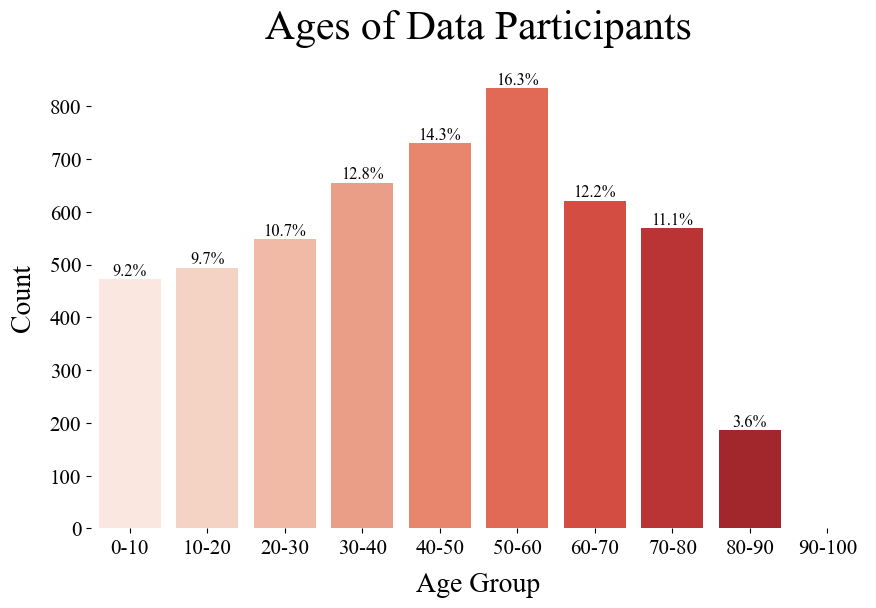

In [97]:
x = new_feature
y = 'Count'
df = age_group_counts_df
xlabel = 'Age Group'
ylabel = 'Count'
labels = labels
title = 'Ages of Data Participants'


barplot(age_group_counts_df, x, y, xlabel, ylabel, labels, title)

## **Ages of Stroke Patients**

In [98]:
feature = 'Age Group'

age_distribution = distributions(data, feature, target)

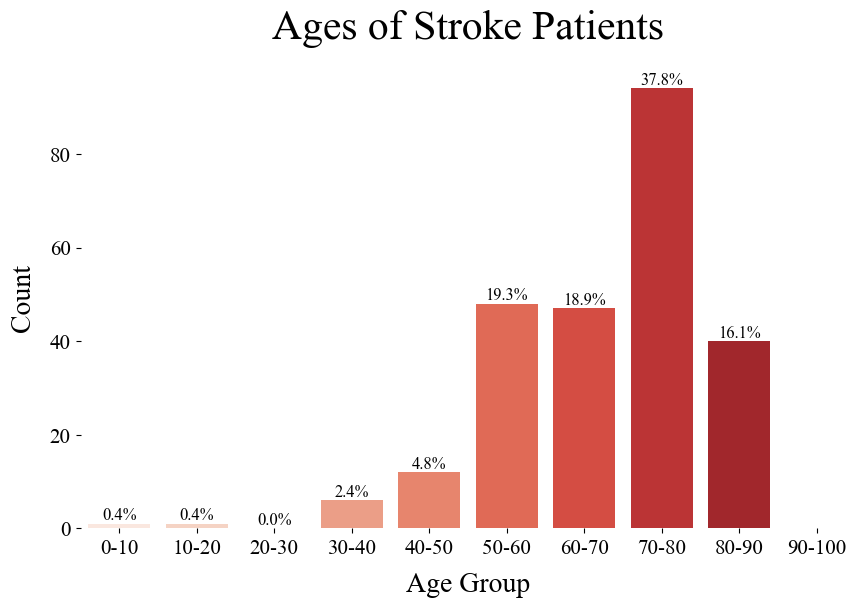

In [99]:
x = 'Age Group'
y = 'Count'
df = age_distribution
xlabel = 'Age Group'
ylabel = 'Count'
labels = labels
title = 'Ages of Stroke Patients'


barplot(age_distribution, x, y, xlabel, ylabel, labels, title)

In [100]:
data = data[data['Age'] > 57]

In [101]:
data.shape

(1524, 13)

### Section Summary
> * The age range is 25 to 35.
> * About 25% of the customers are 28, the youngest group.
> * Only 3% of the customers are 35, the oldest group.

# **Hypothesis Tests**

## **Hypothesis Test: Smoking Habits and Stroke** 

**Null**: There is no significant difference between the proporation of smokers who suffered a stroke and non-smokers.<BR>
**Alternative**: A higher proportion of smokers suffered a stroke compared to non-smokers. 

In [102]:
feature = 'Smoking'

In [103]:
smokers = data.loc[data[feature] == 'smokes']
count_smokers = smokers.shape[0]
count_smoker_stroke = (smokers[target] == 1).sum()
prop_smoker_stroke = count_smoker_stroke / count_smokers
print(
    f"Proportion of smokers who are suffered a stroke {prop_smoker_stroke:.3f}"
)

Proportion of smokers who are suffered a stroke 0.135


In [104]:
nonsmokers = data.loc[data[feature] == 'never smoked']
count_nonsmokers = nonsmokers.shape[0]
count_nonsmoker_stroke = (nonsmokers[target] == 1).sum()
prop_nonsmoker_stroke = count_nonsmoker_stroke / count_nonsmokers
print(
    f"Proportion of nonsmokers who are suffered a stroke {prop_nonsmoker_stroke:.3f}"
)

Proportion of nonsmokers who are suffered a stroke 0.121


In [105]:
numerator = np.array([count_smoker_stroke, count_nonsmoker_stroke])
denominator = np.array([count_smokers, count_nonsmokers])

stat, pval = proportions_ztest(numerator, denominator, alternative="two-sided")

print(f"P-value: {pval:.2f}")

P-value: 0.60


### Section Summary
> * A large majority of customers (over 85%) are college graduates.
> * Only about 15% of customers are non-graduates.  
> * I conducted a proportions z-test to test the hypothesis that there is no significant difference between the proportion of college graduates who bought travel insurance and non-graduates.
> * Using this test, the p-value is much greater than the significance level of 0.05. 
> * Based on this evidence, I fail to reject the null hypothesis. 
> * I can conclude that there is not enough evidence to support that there is a significant difference smokers who are stroke patients and nonsmokers who are stroke patients.

## **Hypothesis Test: Heart Disease and Stroke**

**Null**: There is no significant difference between the proportion of patients who were diagnosed with heart disease who suffered a stroke and patients who were not diagnosed with heart disease.<BR>
**Alternative**: A higher proportion of patients with heart disease suffered a stroke compared to patients who were not diagnosed with heart disease. 

In [106]:
feature = 'Heart Disease'

In [107]:
heartdisease = data.loc[data[feature] == 1]
count_heartdisease = heartdisease.shape[0]
count_heartdisease_stroke = (heartdisease[target] == 1).sum()
prop_heartdisease_stroke = count_heartdisease_stroke / count_heartdisease
print(
    f"Proportion of patients with heart disease diagnosis who suffered a stroke {prop_heartdisease_stroke:.3f}"
)

Proportion of patients with heart disease diagnosis who suffered a stroke 0.198


In [108]:
without_heartdisease = data.loc[data[feature] == 0]
count_without_heartdisease = without_heartdisease.shape[0]
count_without_heartdisease_stroke = (without_heartdisease[target] == 1).sum()
prop_without_heartdisease_stroke = count_without_heartdisease_stroke / count_without_heartdisease
print(
    f"Proportion of patients with heart disease diagnosis who suffered a stroke {prop_nonsmoker_stroke:.3f}"
)

Proportion of patients with heart disease diagnosis who suffered a stroke 0.121


In [109]:
numerator = np.array([count_heartdisease_stroke, count_without_heartdisease_stroke])
denominator = np.array([count_heartdisease, count_without_heartdisease])

stat, pval = proportions_ztest(numerator, denominator, alternative="two-sided")

print(f"P-value: {pval:.2f}")

P-value: 0.00


### Section Summary
> * Nearly 75% of customers reported no history of chronic diseases.  
> * I conducted a proportions z-test to test the hypothesis that there is no significant difference between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history. 
> * The p-value obtained is much greater than the significance level of 0.05. 
> * Therefore, I failed to reject the null hypothesis and can conclude that there is not enough evidence to support that a significant difference exists between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history exists. 

# **Feature Engineering**

## **Age Squared**

In [117]:
data['Age Squared'] = data['Age'] ** 2

## **Glucose Level**

In [139]:
data['Glucose Level'] = pd.cut(data['AVG Glucose'], bins=[50, 100, 150, 200, 250, 300], labels=['very low', 'low', 'normal', 'high', 'very high'])
data['Glucose Level'] = data['Glucose Level'].astype('object')

## **BMI Level**

In [154]:
data['BMI Level'] = pd.cut(data['BMI'], bins=[10, 30, 50, 70, 90, 100], labels=['very low', 'low', 'normal', 'high', 'very high'])
data['BMI Level'] = data['BMI Level'].astype('object')

## **Marital and Work Interaction**

In [159]:
data['Marital Work'] = data['Ever Married'] + '_' + data['Work']

## **Hypertension and Heart Disease Interaction**

In [169]:
data['Hypertension Heart Disease'] = data['Hypertension'].astype(str) + '_' + data['Heart Disease'].astype(str)
data['Hypertension Heart Disease'] = data['Hypertension Heart Disease'] .astype('object')

# **Encoding**

In [170]:
label_encoder = LabelEncoder()

obj = data.dtypes == "object"

for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

## **Correlation between each Feature and the Target Feature**

In [171]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['Stroke'].sort_values(ascending=False)

Stroke                        1.000000
Age                           0.245239
Hypertension Heart_Disease    0.161818
Hypertension Heart Disease    0.161818
Heart Disease                 0.134905
AVG Glucose                   0.131991
Hypertension                  0.127891
Ever Married                  0.108299
BMI                           0.042341
Smoking                       0.028108
Residence                     0.015415
Gender                        0.009081
Work                         -0.032323
Name: Stroke, dtype: float64

In [112]:
data.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work,Residence,AVG Glucose,BMI,Smoking,Stroke,BMI Missing,Age Group
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1,0,1
1,0,61.0,0,0,1,2,0,202.21,28.1,2,1,1,1
2,1,80.0,0,1,1,1,0,105.92,32.5,2,1,0,3
4,0,79.0,1,0,1,2,0,174.12,24.0,2,1,0,2
5,1,81.0,0,0,1,1,1,186.21,29.0,1,1,0,3


## Correlations between Features

In [113]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(8, 8))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
        cmap=plt.cm.Reds,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

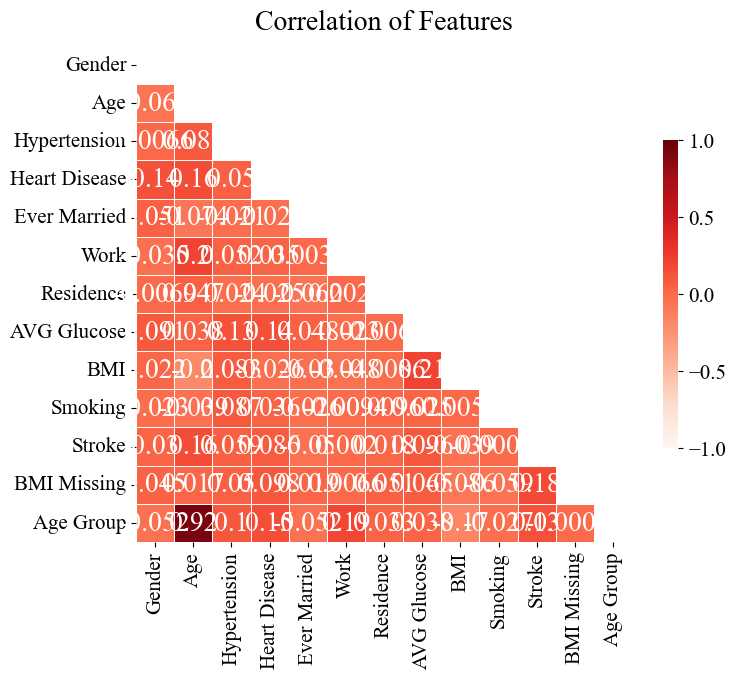

In [114]:
title = "Correlation of Features"
create_heatmap(data, title)

### Section Summary
> * For this project a strong correlation would be a Pearson correlation coefficient of 0.8 or higher. 
> * There are very weak correlations between any one numeric feature and the other numeric features.
> * Furthermore, the correlations between each numeric feature and the target feature are also very weak.

# Machine Learning

In [115]:
random_state = 101

X = data.drop(target, axis=1)
y = data[target]

X, y = shuffle(X, y, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# K-Fold Cross Validation

In [116]:
logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10)
    print(f"{name}: {scores.mean():.2f}")

NameError: name 'Pipeline' is not defined

### Section Summary
> * Since this is a rather simple dataset, I decided to create baselines with default hyperparameters and 10-Fold Cross-validation using three of the simpler machine learning models: Logistic Regression, Decision Tree, and K Nearest Neighbors.
> * Both Decision Tree and KNN surpassed the 75% accuracy standard with only default hyperparameters.   

# Feature Selection

## Feature Selection Based on SHAP

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

sampled_X = shap.sample(X, 100)

explainer = shap.KernelExplainer(dtc.predict_proba, sampled_X)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test, plot_type="bar", color=color_11)

In [ ]:
X_reduced_SHAP = insurance[["AnnualIncome", "Age", "FamilyMembers"]]
y = insurance["TravelInsurance"]
X_reduced_SHAP, y = shuffle(X_reduced_SHAP, y, random_state=None)

In [ ]:
logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_reduced_SHAP, y, cv=10)
    print(f"{name}: {scores.mean():.2f}")

### Section Summary
> * For this section, I used SHAP to identify the top 3 features with the most impact on the target. 
> * The features that SHAP identified are AnnualIncome, Age, FamilyMembers.
> * These features are different than the three features identified by the Pearson correlation coefficient described in the previous section.
> * Using SHAP, both Decision Tree and KNN surpassed the 75% accuracy standard.

## Feature Selection with Backward Elimination

In [ ]:
selector = SelectKBest(score_func=f_classif, k=3)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])
logisticregression_pipeline.fit(X_train_reduced, y_train)


decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])
decisiontree_pipeline.fit(X_train_reduced, y_train)


knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])
knn_pipeline.fit(X_train_reduced, y_train)


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    score = pipeline.score(X_test_reduced, y_test)
    print(f"Test accuracy {name}: {score:.2f}")
    selected_indices = selector.get_support(indices=True)
    print(f"Selected feature indices: {selected_indices}", end="\n\n")

### Section Summary
> * For this section, I used Backward Elimination to pick the top 3 features with the most impact on the target. 
> * The features identified by this algorithm are AnnualIncome, TravelledAbroad, FrequentFlyer. 
> * With this algorithm, only Decision Tree surpassed the 75% accuracy standard. 

# Optuna

## Logistic Regression with Optuna

In [ ]:
def logisticregression_optuna_objective(trial):

    penalty = trial.suggest_categorical("penalty", ["none", "l2"])
    C = trial.suggest_loguniform("C", 1e-5, 10)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "sag", "saga"])

    model = LogisticRegression(penalty=penalty, C=C, solver=solver)

    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [ ]:
logisticregression_study = optuna.create_study(direction="maximize")
logisticregression_study.optimize(logisticregression_optuna_objective, n_trials=1000)

In [ ]:
best_params = logisticregression_study.best_params
print(f"Best Accuracy Score: {logisticregression_study.best_value:.5f}")
print("Best hyperparameters:", best_params)

In [ ]:
logisticregression_optuna = LogisticRegression(**best_params)
logisticregression_optuna.fit(X_train, y_train)

In [ ]:
y_predict = logisticregression_optuna.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(logisticregression_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

## Decision Tree with Optuna

In [ ]:
def decisiontree_optuna_objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
    )
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [ ]:
decisiontree_study = optuna.create_study(direction="maximize")
decisiontree_study.optimize(decisiontree_optuna_objective, n_trials=100)

In [ ]:
print(f"Best Accuracy Score: {decisiontree_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in decisiontree_study.best_params.items():
    print(f"\t{key}: {value}")

In [ ]:
decisiontree_best_params = decisiontree_study.best_params

decisiontree_optuna = DecisionTreeClassifier(
    criterion=decisiontree_best_params["criterion"],
    splitter=decisiontree_best_params["splitter"],
    max_depth=decisiontree_best_params["max_depth"],
    min_samples_split=decisiontree_best_params["min_samples_split"],
    min_samples_leaf=decisiontree_best_params["min_samples_leaf"],
    random_state=0,
)
decisiontree_optuna.fit(X_train, y_train)

In [ ]:
y_predict = decisiontree_optuna.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(decisiontree_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

## KNN with Optuna

In [ ]:
def knn_optuna_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 3, 20)
    p = trial.suggest_int("p", 1, 2)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [ ]:
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_optuna_objective, n_trials=100)

In [ ]:
print(f"Best accuracy score: {knn_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in knn_study.best_params.items():
    print(f"\t{key}: {value}")

In [ ]:
knn_best_params = knn_study.best_params
knn_optuna = KNeighborsClassifier(
    n_neighbors=knn_best_params["n_neighbors"], p=knn_best_params["p"]
)
knn_optuna.fit(X_train, y_train)

In [ ]:
y_predict = knn_optuna.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(knn_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

### Section Summary
> * For this section, I used OPTUNA to choose the most optimal hyperparameters for each of the three models.  
> * The results I obtained were considerably better than the previous results of this project.
> * All three models surpassed accuracy scores above 80%.

# Three-Model Stacking Classifier

In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

estimators = [("lr", model1), ("knn", model2), ("dt", model3)]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [ ]:
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)

In [ ]:
y_predict = stacking_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(stacking_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

### Section Summary
> * A stacking classifier trains several different classifiers and makes the final prediction based on the outputs of the individual classifiers.
> * For this section, I used Stacking Classifier with the same three models as in previous sections: Logistic Regression, Decision Tree and K Nearest Neighbor.  
> * Stacking Classifier also surpassed 80% accuracy score.

# Three-Model Soft Voting Classifier

In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

soft_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="soft"
)
soft_voting_clf.fit(X_train, y_train)

In [ ]:
y_predict = soft_voting_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(soft_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

### Section Summary
> * The Soft Voting classifier averages the probabilities across all base classifiers for each class label. The class label with the highest average probability or score is selected as the final prediction.
> * For this part of the project, I used Soft Voting Classifier with the same three models as in the previous sections. 
> * Soft Voting Classifier surpassed the 75% accuracy standard by a very slight margin.

# Three-Model Hard Voting Classifier

In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="hard"
)
hard_voting_clf.fit(X_train, y_train)

In [ ]:
y_predict = hard_voting_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(hard_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

### Section Summary
> * In a hard voting classifier, each classifier independently predicts the class labels for a given input, and the final prediction is determined by a majority vote. 
> * For this section, I used Hard Voting Classifier with the same three models as in the other sections above.
> * Hard Voting Classifier obtained nearly 80% accuracy.

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 2000 data points related to customers of a travel insurance business. <br> 
>* **The Goal of the Project:** The goal of this project was to find a model that could predict if a new customer would buy travel insurance with a high level of accuracy (75% or higher).<br>
>* **Models:** I utilized several models with varying results. Many of the models exceeded the 75% accuracy standard. <br>
>* **Feature Engineering and Hyperparameter Testing:** I tried feature engineering and hyperparameter testing with techniques such as Backward Elimination, SHAP and OPTUNA. OPTUNA showed the best results. In some cases, the model surpassed 80% accuracy.<br> 
>* **Multiple Model Classifiers:** I used Stacking, Soft-Voting and Hard-Voting classifiers, all with results that reached or even surpassed 80% accuracy. 
>* **Stochastic System:** Human behavior is hard to classify and cannot be easily capsulized and predicted. For this reason, obtaining a very high accuracy score (over 80%) may be very difficult to do.<br> 
>* **K Nearest Neighbor:** For a simple model and using only default hyperparameters, K Nearest was able to get better or similar results than any other model, including the more complex ones.<br>  
>* **Business Recommendation:** With accuracy scores of over 80%, I recommend utilizing a simple KNN machine learning model to predict if a future customer will purchase travel insurance.<br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Domain Knowledge:** It is best if the data scientist has adequate domain knowledge on the topic of the analysis. I do not have any expertise in the insurance or travel industry. There may be parts of the data that I have overlooked that may have been important and I may have given importance to parts that may have had little significance. <br>
>* **More Detailed Data on Customers:** The data provide only general employment information, namely if the person is a government worker or works in the private sector. These categories are too broad. More detailed information could have helped make better predictions. <br>  
>* **Feature Engineering:** Some of the data could have been combined in a way to create additional features. For example, I could have created a new feature by combining AnnualIncome with FamilyMembers to obtain income per family member. This could have added more information to the models and created better performance.  <br>  
>* **Classifier Models:** For the Classifier models, I could have used the based models with hyperparameters identified as most effecitive by Optuna. I may have gotten even better results.  <br> 
>* **Pipeline:** It would have been more efficient and cleaner to put the pre-processing steps into a pipeline.
>* **Statistics:** Continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** Continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** Continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** Continue to write better and more efficient Python code. <br>
>* **Clean Code:** Continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** Continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>

# Image Credit

Image by <a href="https://pixabay.com/users/mytz-4882715/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2640661">MYTZ</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2640661">Pixabay</a>